Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

In [225]:
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 10)

In [309]:
import pandas as pd

npi_data = pd.read_csv('./data.csv')
npi_data

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18,2,2,2,2,1,2,1,2,2,2,1,1,2,1,1,1,2,1,1,1,1,1,1,2,2,2,1,2,2,2,1,2,1,1,1,2,2,2,1,2,211,1,50
1,6,2,2,2,1,2,2,1,2,1,1,2,2,2,1,2,2,1,1,2,1,2,2,1,2,2,2,2,1,2,2,2,1,2,2,1,2,2,2,2,1,149,1,40
2,27,1,2,2,1,2,1,2,1,2,2,2,1,1,1,1,1,2,2,1,1,2,2,2,2,1,2,1,1,2,1,2,2,1,1,2,1,1,2,1,2,168,1,28
3,29,1,1,2,2,2,1,2,1,1,2,1,1,1,1,1,1,2,2,1,2,1,1,1,2,1,2,1,2,2,1,1,2,1,1,2,1,2,2,1,1,230,1,37
4,6,1,2,1,1,1,2,1,2,1,2,2,2,2,2,1,1,1,1,1,1,1,2,1,2,2,1,2,1,2,2,2,1,2,2,1,2,2,2,0,1,389,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1,2,2,2,1,1,2,1,2,1,1,1,2,2,2,1,2,1,1,1,1,2,1,1,2,2,1,2,1,2,2,2,1,2,2,1,2,2,2,2,1,243,1,24
11239,10,2,2,1,1,1,2,1,1,1,2,2,2,2,2,2,2,1,1,2,2,2,1,2,2,2,2,2,1,1,2,2,1,2,2,1,2,1,2,2,1,197,1,39
11240,6,1,2,2,1,1,2,1,2,1,1,2,2,2,2,1,2,1,2,2,1,2,1,1,2,2,2,2,1,1,2,1,1,2,2,1,2,2,2,2,1,447,2,33
11241,12,2,2,1,1,1,1,1,1,1,2,2,2,2,2,1,1,2,2,2,1,2,1,1,2,2,1,2,1,1,2,2,1,1,1,2,2,2,2,2,1,167,1,24


In [310]:
import numpy as np

npi_data.replace(0, np.nan, inplace=True)
npi_data

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
0,18.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,211,1.0,50.0
1,6.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,149,1.0,40.0
2,27.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,168,1.0,28.0
3,29.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,230,1.0,37.0
4,6.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,NaN,1.0,389,1.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,243,1.0,24.0
11239,10.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,197,1.0,39.0
11240,6.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,447,2.0,33.0
11241,12.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,167,1.0,24.0


In [311]:
npi_data['Q20'].value_counts(normalize=True)                        

1.0    0.735612
2.0    0.264388
Name: Q20, dtype: float64

In [312]:
npi_data.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11159.000000,11226.000000,11220.000000,11223.000000,11214.000000,11220.000000,11226.000000,11220.000000,11221.000000,11201.000000,11200.000000,11219.000000,11191.000000,11195.000000,11204.000000,11211.000000,11222.000000,11196.000000,11207.000000,11208.000000,11207.000000,11208.000000,11208.000000,11216.000000,11199.000000,11204.000000,11220.000000,11211.000000,11202.000000,11202.000000,11181.000000,11204.000000,11195.000000,11201.000000,11206.000000,11180.000000,11216.000000,11198.000000,11205.000000,11202.000000,11209.000000,1.124300e+04,11231.000000,11231.000000
mean,13.399767,1.387850,1.788503,1.831061,1.177278,1.425223,1.630857,1.305615,1.415382,1.461566,1.515536,1.551743,1.567599,1.673426,1.743663,1.218981,1.551862,1.268131,1.333898,1.286492,1.264388,1.779265,1.384993,1.157810,1.693187,1.776330,1.518806,1.740434,1.199072,1.566149,1.682676,1.586844,1.302456,1.550308,1.673389,1.264669,1.811965,1.695481,1.852120,1.612837,1.419217,1.195542e+05,1.431484,34.050574
std,8.461895,0.487282,0.408388,0.374715,0.381921,0.494399,0.482594,0.460688,0.492810,0.498543,0.499781,0.497338,0.495431,0.468981,0.436630,0.413574,0.497325,0.443006,0.471625,0.452142,0.441027,0.414761,0.486615,0.364579,0.461192,0.416722,0.499668,0.438416,0.399320,0.495627,0.465456,0.492422,0.459342,0.497485,0.468994,0.441177,0.390757,0.460224,0.354997,0.487123,0.493453,1.262668e+07,0.502445,14.982386
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+00,1.000000,2.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.040000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.570000e+02,1.000000,30.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,43.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,509.000000


In [313]:
npi_data.isnull().sum()

score     84
Q1        17
Q2        23
Q3        20
Q4        29
          ..
Q39       41
Q40       34
elapse     0
gender    12
age       12
Length: 44, dtype: int64

In [383]:
npi_data=npi_data.mask(npi_data==0).fillna(npi_data.median())
npi_data.describe()

,score,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,elapse,gender,age
count,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,1.103300e+04,11033.000000,11033.000000
mean,13.311883,1.388018,1.791534,1.833681,1.174477,1.421825,1.635457,1.303544,1.416931,1.459530,1.516451,1.553249,1.573099,1.679779,1.746850,1.218345,1.554428,1.266020,1.329376,1.284963,1.261760,1.780567,1.383214,1.156712,1.696365,1.779933,1.518535,1.744675,1.197589,1.569383,1.687030,1.592405,1.299556,1.554246,1.676153,1.260038,1.814738,1.698994,1.854346,1.615064,1.415934,1.218237e+05,1.429620,34.301097
std,8.395693,0.487321,0.406230,0.372384,0.379536,0.493873,0.481324,0.459809,0.493074,0.498382,0.499752,0.497179,0.494650,0.466583,0.434836,0.413142,0.497051,0.441895,0.470008,0.451417,0.439613,0.413881,0.486192,0.363545,0.459848,0.414310,0.499679,0.436063,0.398198,0.495185,0.463723,0.491409,0.458084,0.497071,0.467964,0.438675,0.388528,0.458716,0.352775,0.486602,0.492905,1.274628e+07,0.501412,13.650684
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000e+00,1.000000,16.000000
25%,7.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.050000e+02,1.000000,23.000000
50%,12.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.580000e+02,1.000000,31.000000
75%,18.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.410000e+02,2.000000,44.000000
max,40.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.338845e+09,3.000000,86.000000


In [315]:
npi_data.isnull().sum()

score     0
Q1        0
Q2        0
Q3        0
Q4        0
         ..
Q39       0
Q40       0
elapse    0
gender    0
age       0
Length: 44, dtype: int64

In [316]:
npi_data.shape

(11243, 44)

In [317]:
# look at age value counts for whole dataset

npi_data['Q20'].value_counts()

1.0    8280
2.0    2963
Name: Q20, dtype: int64

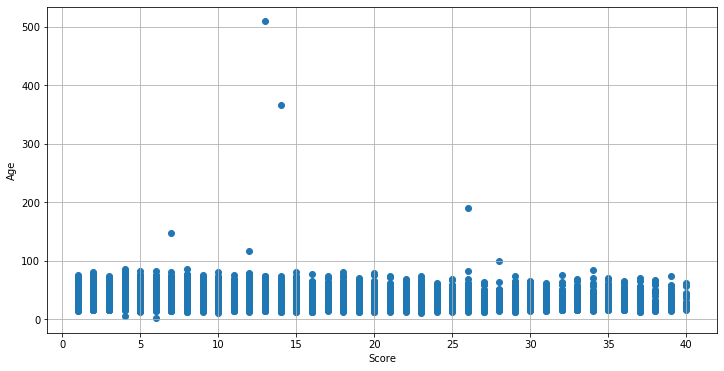

In [318]:
import matplotlib.pyplot as plt

# indentify outliers for age by using scatter plot 

fig, ax = plt.subplots(figsize=(12,6))
ax.grid()


ax.scatter(npi_data['score'], npi_data['age'])
ax.set_xlabel('Score')
ax.set_ylabel('Age')
plt.show()

In [319]:
# set age range for 15-100 years old for dataset 

index = npi_data[(npi_data['age'] >= 100)|(npi_data['age'] <= 15)].index
npi_data.drop(index, inplace=True)
npi_data['age'].describe()

count    11033.000000
mean        34.301097
std         13.650684
min         16.000000
25%         23.000000
50%         31.000000
75%         44.000000
max         86.000000
Name: age, dtype: float64

In [320]:
# clean gender column
# omitt useless gender from dataset '0'

index2 = npi_data[(npi_data['gender'] == 0)].index
npi_data.drop(index2, inplace=True)
npi_data['gender'].describe()

count    11033.000000
mean         1.429620
std          0.501412
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: gender, dtype: float64

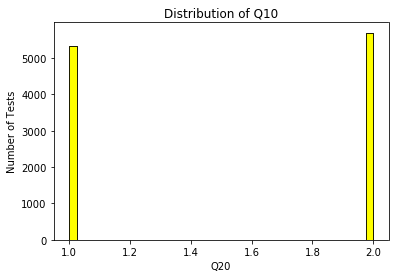

In [385]:
import seaborn as sns

# matplotlib histogram for distribution of scores
# historgram formatting

plt.hist(npi_data['Q10'], color = 'yellow', edgecolor = 'black',
         bins = 40)

sns.distplot(npi_data['Q10'], hist=True, kde=False, 
             bins=40, color = 'yellow',
             hist_kws={'edgecolor':'black'})

# add labels and title to histogram

plt.title('Distribution of Q10')
plt.xlabel('Q20')
plt.ylabel('Number of Tests')

plt.show()

### Train, Test, Validation Splits 70/15/15

In [322]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(npi_data, test_size=0.3,
                              stratify = npi_data['gender'], random_state = 42)

train.shape, test.shape

((7723, 44), (3310, 44))

In [323]:
test, val = train_test_split(test, test_size=0.5,
                              stratify = test['gender'], random_state = 42)
train.shape, test.shape, val.shape

((7723, 44), (1655, 44), (1655, 44))

In [386]:
target = 'Q10'
X_test = test.drop(columns=target)
y_test = test[target]
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]

### Decision Tree Classifier

In [387]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import QuantileTransformer

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
    
    
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.6803625377643504


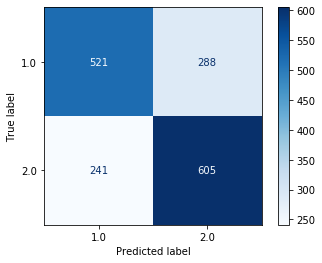

In [388]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [389]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform


# set of parameters to test
params = {
    'decisiontreeclassifier__min_samples_split': [2, 10, 20],
    'decisiontreeclassifier__max_features': randint(1, 9), 
    'decisiontreeclassifier__max_depth': randint(1, 9)
                        }


search = RandomizedSearchCV(
    pipeline, 
    param_distributions=params, 
    n_iter=7, 
    cv=5, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

search.fit(X_train, y_train);

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  24 out of  35 | elapsed:    2.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  28 out of  35 | elapsed:    3.0s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:    3.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    3.0s finished


In [390]:
print('Best hyperparameters', search.best_params_)

Best hyperparameters {'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__max_features': 5, 'decisiontreeclassifier__min_samples_split': 20}


In [391]:
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    DecisionTreeClassifier(max_features=5, max_depth=7, min_samples_split=20, random_state=42)  
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')


Val score (acc): 0.7558912386706949


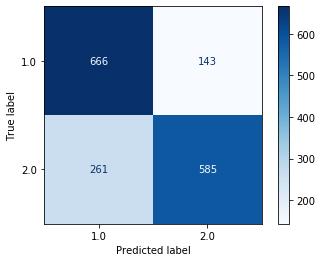

In [392]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [393]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('onehotencoder',
                                                 OneHotEncoder(cols=[],
                                                               drop_invariant=False,
                                                               handle_missing='value',
                                                               handle_unknown='value',
                                                               return_df=True,
                                                               use_cat_names=False,
                                                               verbose=0)),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(ccp_alpha=0.0,
                                                                        class_weight=None,
                      

In [394]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

Q18      -9.667674e-04
gender   -8.459215e-04
Q5       -3.625378e-04
Q24      -4.440892e-17
Q22      -4.440892e-17
              ...     
Q23       3.867069e-03
Q11       5.317221e-03
Q20       6.042296e-03
score     7.117825e-02
Q33       1.272508e-01
Length: 43, dtype: float64

In [395]:
permuter.feature_importances_std_

array([0.00457622, 0.00072508, 0.        , 0.0006162 , 0.00126744,
       0.00072508, 0.        , 0.        , 0.00081962, 0.        ,
       0.00268593, 0.        , 0.        , 0.00088803, 0.0006162 ,
       0.00230559, 0.00224786, 0.00098176, 0.0006162 , 0.00093607,
       0.00024169, 0.00054044, 0.00246478, 0.00108088, 0.00024169,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00045216, 0.00029601, 0.00796667, 0.00355624, 0.        ,
       0.00231192, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00164812, 0.00181671])

In [396]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)


Weight,Feature
0.1273 ± 0.0159,Q33
0.0712 ± 0.0092,score
0.0060 ± 0.0019,Q20
0.0053 ± 0.0054,Q11
0.0039 ± 0.0049,Q23
0.0037 ± 0.0046,Q16
0.0027 ± 0.0036,age
0.0023 ± 0.0018,Q14
0.0021 ± 0.0015,Q1
0.0016 ± 0.0071,Q34


In [397]:
y_pred = pipeline.predict(X_val)
roc_auc_score(y_pred, y_val)

0.761009015256588

### Ridge ClassifierCV 

In [398]:
from sklearn.linear_model import RidgeClassifierCV
pipeline = make_pipeline(
    ce.OneHotEncoder(),
    RidgeClassifierCV()
)

pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.8362537764350453


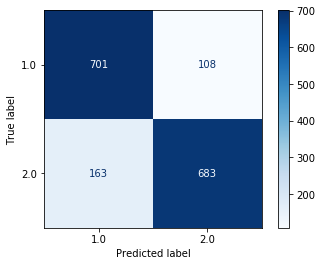

In [399]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [400]:
y_pred = pipeline.predict(X_val)
roc_auc_score(y_pred, y_val)

0.8374032811256262

In [401]:
permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('onehotencoder',
                                                 OneHotEncoder(cols=[],
                                                               drop_invariant=False,
                                                               handle_missing='value',
                                                               handle_unknown='value',
                                                               return_df=True,
                                                               use_cat_names=False,
                                                               verbose=0)),
                                                ('ridgeclassifiercv',
                                                 RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]),
                                                                   class_weight=None,
                  

In [402]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

gender   -0.000725
Q36      -0.000604
age       0.000242
elapse    0.000483
Q11       0.000604
            ...   
Q2        0.017523
Q26       0.017764
Q24       0.019577
Q18       0.022236
score     0.417523
Length: 43, dtype: float64

In [403]:
permuter.feature_importances_std_

array([0.01288583, 0.00134568, 0.00487894, 0.00218193, 0.0026087 ,
       0.00168319, 0.00282376, 0.002631  , 0.00200036, 0.00304762,
       0.00085451, 0.00273977, 0.00443358, 0.00346893, 0.00298467,
       0.00369717, 0.00185647, 0.00396036, 0.00117164, 0.00331832,
       0.00306673, 0.00292037, 0.00137786, 0.00528968, 0.00181671,
       0.00140929, 0.00205793, 0.00204369, 0.00403343, 0.00233705,
       0.00224786, 0.00329624, 0.00434037, 0.00276629, 0.00369322,
       0.00101107, 0.00283409, 0.0036734 , 0.00304282, 0.00487295,
       0.00045216, 0.00123239, 0.00081962])

In [404]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.4175 ± 0.0258,score
0.0222 ± 0.0079,Q18
0.0196 ± 0.0106,Q24
0.0178 ± 0.0028,Q26
0.0175 ± 0.0098,Q2
0.0173 ± 0.0056,Q6
0.0172 ± 0.0045,Q31
0.0162 ± 0.0069,Q14
0.0160 ± 0.0097,Q40
0.0157 ± 0.0041,Q27


### Random Forest Classifier

In [405]:
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    ce.OneHotEncoder(),
    RandomForestClassifier(random_state=42)
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.7740181268882175


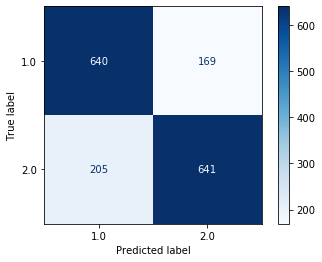

In [406]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [407]:
y_pred = pipeline.predict(X_val)
roc_auc_score(y_pred, y_val)

0.7743772371977501

In [408]:
permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('onehotencoder',
                                                 OneHotEncoder(cols=[],
                                                               drop_invariant=False,
                                                               handle_missing='value',
                                                               handle_unknown='value',
                                                               return_df=True,
                                                               use_cat_names=False,
                                                               verbose=0)),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(bootstrap=True,
                                                                        ccp_alpha=0.0,
                         

In [409]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

Q26      -0.004592
Q17      -0.004592
Q5       -0.003505
gender   -0.003505
elapse   -0.003142
            ...   
Q24       0.005438
Q1        0.009184
Q36       0.018610
score     0.054502
Q33       0.059335
Length: 43, dtype: float64

In [410]:
permuter.feature_importances_std_

array([0.00756036, 0.00427938, 0.00117164, 0.00130155, 0.00117164,
       0.00543672, 0.00304762, 0.00155699, 0.00393446, 0.00081962,
       0.00304282, 0.00265861, 0.00209311, 0.00135649, 0.00155699,
       0.00149966, 0.00347314, 0.00038215, 0.00239872, 0.00123239,
       0.00181671, 0.00134568, 0.00204369, 0.00283409, 0.00191074,
       0.00204369, 0.00189539, 0.00118404, 0.0022737 , 0.00220854,
       0.0022737 , 0.0006162 , 0.00837594, 0.00181671, 0.0006162 ,
       0.00492957, 0.00145015, 0.00196351, 0.00123239, 0.00235572,
       0.00203653, 0.00239872, 0.00344782])

In [411]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.0593 ± 0.0168,Q33
0.0545 ± 0.0151,score
0.0186 ± 0.0099,Q36
0.0092 ± 0.0086,Q1
0.0054 ± 0.0057,Q24
0.0042 ± 0.0038,Q25
0.0035 ± 0.0061,Q11
0.0034 ± 0.0012,Q35
0.0030 ± 0.0042,Q13
0.0019 ± 0.0023,Q2


### XGB Classifier 

In [412]:
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(random_state=42)
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.7915407854984894


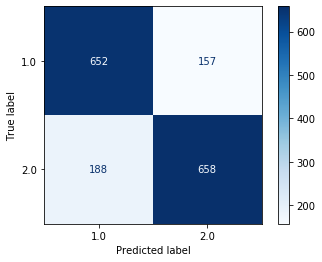

In [413]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [414]:
permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                drop_invariant=False,
                                                                handle_missing='value',
                                                                handle_unknown='value',
                                                                mapping=[],
                                                                return_df=True,
                                                                verbose=0)),
                                                ('xgbclassifier',
                                                 XGBClassifier(base_score=0.5,
                                                               booster='gbtree',
                                                  

In [415]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

Q5      -0.003988
Q40     -0.003263
Q17     -0.001813
Q15     -0.001692
Q18     -0.000846
           ...   
Q13      0.004955
Q1       0.011964
Q36      0.018973
Q33      0.065861
score    0.144290
Length: 43, dtype: float64

In [416]:
permuter.feature_importances_std_

array([0.00953382, 0.00331832, 0.00233705, 0.00072508, 0.0006619 ,
       0.00367737, 0.00311867, 0.00045216, 0.0007643 , 0.00085451,
       0.00271298, 0.00081962, 0.00134568, 0.00355213, 0.00129028,
       0.        , 0.00183272, 0.00029601, 0.        , 0.00173447,
       0.00085451, 0.00048338, 0.00105351, 0.00196351, 0.00187214,
       0.        , 0.        , 0.00232452, 0.00173447, 0.        ,
       0.00024169, 0.00274509, 0.00704647, 0.00137786, 0.00130155,
       0.00277156, 0.00029601, 0.00318355, 0.00024169, 0.00193353,
       0.00302356, 0.00024169, 0.00212771])

In [417]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.1443 ± 0.0191,score
0.0659 ± 0.0141,Q33
0.0190 ± 0.0055,Q36
0.0120 ± 0.0066,Q1
0.0050 ± 0.0027,Q13
0.0044 ± 0.0047,Q2
0.0044 ± 0.0054,Q11
0.0039 ± 0.0062,Q6
0.0025 ± 0.0064,Q38
0.0024 ± 0.0028,Q34


In [418]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(random_state=42, n_estimators=1000,
                 max_depth=3, learning_rate=0.6, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.8574018126888218


In [419]:
pipeline.fit(X_train, y_train)
print(f'Test score (acc): {pipeline.score(X_test, y_test)}')

Test score (acc): 0.8561933534743202


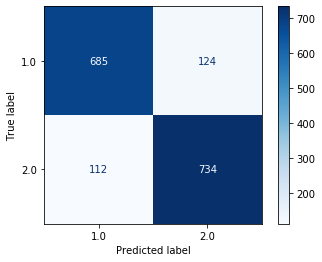

In [420]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [421]:
y_pred = pipeline.predict(X_val)

In [422]:
roc_auc_score(y_pred, y_val)

0.8574754396586265

### Decision Tree Classifier 

In [423]:
from sklearn.tree import DecisionTreeClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    DecisionTreeClassifier(random_state=42)
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.6803625377643504


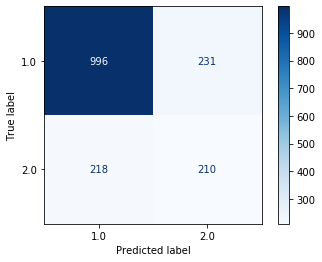

In [360]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [361]:
permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                drop_invariant=False,
                                                                handle_missing='value',
                                                                handle_unknown='value',
                                                                mapping=[],
                                                                return_df=True,
                                                                verbose=0)),
                                                ('decisiontreeclassifier',
                                                 DecisionTreeClassifier(ccp_alpha=0.0,
                                                                        class_weight=None,
                       

In [362]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

elapse   -0.005438
Q21      -0.004955
Q36      -0.004109
Q22      -0.001934
Q35      -0.001813
            ...   
Q7        0.007976
age       0.008459
Q10       0.012447
Q30       0.023807
score     0.116979
Length: 43, dtype: float64

In [363]:
permuter.feature_importances_std_

array([0.00859282, 0.00384054, 0.00164812, 0.00149966, 0.00103956,
       0.00261988, 0.00348992, 0.00224136, 0.00159407, 0.00188767,
       0.00485795, 0.00287502, 0.00159407, 0.00172602, 0.00164812,
       0.0006162 , 0.00277156, 0.00168319, 0.00163923, 0.00124418,
       0.00059202, 0.00313734, 0.00139889, 0.00129028, 0.00359707,
       0.0021482 , 0.0006619 , 0.00180866, 0.00168319, 0.00400071,
       0.00154758, 0.00081962, 0.00145015, 0.00392331, 0.00137786,
       0.00271298, 0.00124418, 0.00070465, 0.00070465, 0.00224786,
       0.00483384, 0.00470524, 0.00605437])

In [364]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.1170 ± 0.0172,score
0.0238 ± 0.0080,Q30
0.0124 ± 0.0097,Q10
0.0085 ± 0.0121,age
0.0080 ± 0.0045,Q7
0.0076 ± 0.0094,gender
0.0057 ± 0.0043,Q26
0.0056 ± 0.0070,Q6
0.0051 ± 0.0072,Q25
0.0050 ± 0.0032,Q8


### Extra Trees Classifier 

In [365]:
from sklearn.ensemble import ExtraTreesClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    ExtraTreesClassifier()
)
pipeline.fit(X_train, y_train)
print(f'Val score (acc): {pipeline.score(X_val, y_val)}')

Val score (acc): 0.8108761329305136


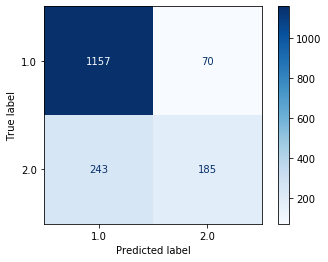

In [366]:
plot_confusion_matrix(pipeline, X_val, y_val, 
                      xticks_rotation='horizontal', 
                      values_format='.0f',
                      cmap='Blues');

In [367]:
permuter = PermutationImportance(
    pipeline,
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val, y_val)

PermutationImportance(cv='prefit',
                      estimator=Pipeline(memory=None,
                                         steps=[('ordinalencoder',
                                                 OrdinalEncoder(cols=[],
                                                                drop_invariant=False,
                                                                handle_missing='value',
                                                                handle_unknown='value',
                                                                mapping=[],
                                                                return_df=True,
                                                                verbose=0)),
                                                ('extratreesclassifier',
                                                 ExtraTreesClassifier(bootstrap=False,
                                                                      ccp_alpha=0.0,
                               

In [368]:
feature_names = X_val.columns.to_list()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=True)

Q38   -0.001813
Q23   -0.001208
Q34   -0.001088
Q15   -0.000846
Q31   -0.000725
         ...   
Q28    0.003746
Q39    0.004109
Q26    0.004713
Q2     0.007734
Q30    0.014743
Length: 43, dtype: float64

In [369]:
permuter.feature_importances_std_

array([0.00220854, 0.00163923, 0.00353151, 0.00098176, 0.00112068,
       0.00224786, 0.00217523, 0.00205793, 0.00157564, 0.00145015,
       0.00197094, 0.00103956, 0.00098176, 0.00118404, 0.00187214,
       0.00090433, 0.00196351, 0.00098176, 0.00177607, 0.00155699,
       0.00166575, 0.00154758, 0.0006619 , 0.00124418, 0.00103956,
       0.002631  , 0.00105351, 0.00103956, 0.00318355, 0.0021482 ,
       0.00059202, 0.00164812, 0.00120846, 0.00045216, 0.00081962,
       0.00114645, 0.00185647, 0.00137786, 0.00045216, 0.00180866,
       0.00096677, 0.00200036, 0.00140929])

In [370]:
eli5.show_weights(permuter, 
                  top=None, 
                  feature_names=feature_names)

Weight,Feature
0.0147 ± 0.0043,Q30
0.0077 ± 0.0071,Q2
0.0047 ± 0.0053,Q26
0.0041 ± 0.0009,Q39
0.0037 ± 0.0021,Q28
0.0036 ± 0.0041,Q7
0.0036 ± 0.0024,Q33
0.0035 ± 0.0029,Q9
0.0033 ± 0.0036,Q18
0.0027 ± 0.0028,age
